# Setup and Initialization

**Using GPU**

`Edit` -> `Notebook Settings` -> `Hardware Accerelator` -> `GPU`









**Upload** images folder from [Drive](https://drive.google.com/drive/folders/1bT3DmjmaEXe4JNAOUm1pQK20rBejpeTK)

In [ ]:
#Check for GPU accessibilty
!nvidia-smi

Thu May 23 17:27:15 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 546.12                 Driver Version: 546.12       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3060 ...  WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   45C    P0              22W /  86W |      0MiB /  6144MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

**Install SAM and other dependencies**

In [ ]:
!pip install -q 'git+https://github.com/facebookresearch/segment-anything.git'
!pip install supervision

ERROR: Invalid requirement: "'git+https://github.com/facebookresearch/segment-anything.git'"

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for supervision from https://files.pythonhosted.org/packages/50/1a/971a415d67011854c2c59716c49b3de151d54b422c6dd0a6489e0152b42e/supervision-0.20.0-py3-none-any.whl.metadata
  Obtaining dependency information for opencv-python-headless>=4.5.5.64 from https://files.pythonhosted.org/packages/20/44/458a0a135866f5e08266566b32ad9a182a7a059a894effe6c41a9c841ff1/opencv_python_headless-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/111.0 kB ? eta -:--:--
   ---------------------------------------- 111.0/111.0 kB 3.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   ---------------------------------------- 0.4/38.5 MB 13.2 MB/s eta 0:00:03
   - -------------------------------------- 1.0/38.5 MB 12.9 MB/s eta 0:00:03
   - -------------------------------------- 1.4/38.5 MB 11.1 MB/s eta 0:00:04
   -- ------------------------------------- 1.9/38.5 MB 12.4 MB/s eta 0:00:03
   -- ----


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import os
HOME_PATH = os.getcwd()
print(HOME_PATH)

d:\mc\py\nectecproj\iris


In [ ]:
# Download SAM weights
!mkdir -p {HOME_PATH}/weights
!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth -P {HOME_PATH}/weights

The syntax of the command is incorrect.
'wget' is not recognized as an internal or external command,
operable program or batch file.


# Test SAM Model on normal image

In [ ]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

MODEL_TYPE = "vit_h"
CHECKPOINT_PATH = os.path.join(HOME_PATH, "weights", "sam_vit_h_4b8939.pth")
DEVICE = "cpu"  # "cpu"/"cuda"

sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)

mask_generator = SamAutomaticMaskGenerator(sam)

In [ ]:
import os
import torch
import cv2

image1_path = os.path.join(HOME_PATH, "images", "city.jpg")
image2_path = os.path.join(HOME_PATH, "images", "man.jpg")

img1 = cv2.imread(image1_path)
img2 = cv2.imread(image2_path)

#cv2_imshow(img)

masks1 = mask_generator.generate(img1)
masks2 = mask_generator.generate(img2)

`SamAutomaticMaskGenerator` returns a `list` of masks, where each mask is a `dict` containing various information about the mask:

* `segmentation` - `[np.ndarray]` - the mask with `(W, H)` shape, and `bool` type
* `area` - `[int]` - the area of the mask in pixels
* `bbox` - `[List[int]]` - the boundary box of the mask in `xywh` format
* `predicted_iou` - `[float]` - the model's own prediction for the quality of the mask
* `point_coords` - `[List[List[float]]]` - the sampled input point that generated this mask
* `stability_score` - `[float]` - an additional measure of mask quality
* `crop_box` - `List[int]` - the crop of the image used to generate this mask in `xywh` format

In [ ]:
print(masks2[0].keys())
print(masks2[0])

dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])
{'segmentation': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), 'area': 110125, 'bbox': [206, 34, 494, 455], 'predicted_iou': 1.0438467264175415, 'point_coords': [[608.671875, 130.15625]], 'stability_score': 0.980954110622406, 'crop_box': [0, 0, 735, 490]}


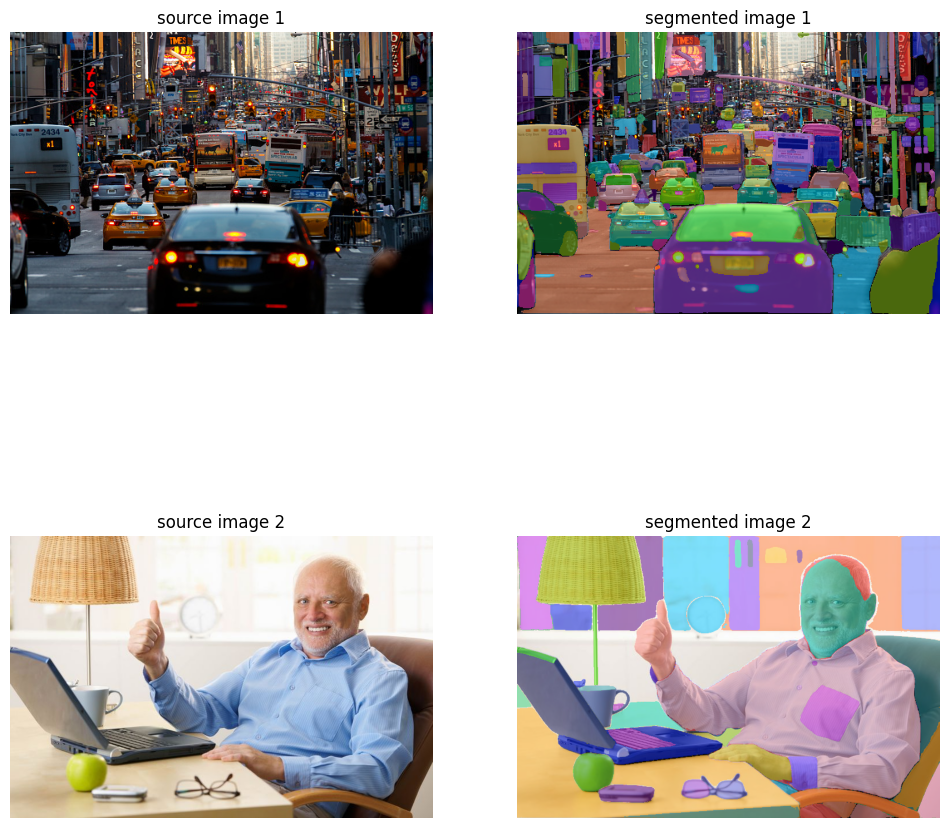

In [ ]:
import supervision as sv

mask_annotator = sv.MaskAnnotator(color_lookup=sv.ColorLookup.INDEX)

detection1 = sv.Detections.from_sam(sam_result=masks1)
detection2 = sv.Detections.from_sam(sam_result=masks2)

img1_annotated = mask_annotator.annotate(scene=img1.copy(), detections=detection1)
img2_annotated = mask_annotator.annotate(scene=img2.copy(), detections=detection2)

sv.plot_images_grid(
    images=[img1, img1_annotated,img2, img2_annotated],
    grid_size=(2, 2),
    titles=['source image 1', 'segmented image 1','source image 2', 'segmented image 2']
)

# Prompted Segmentation

In [ ]:
mask_predictor = SamPredictor(sam)



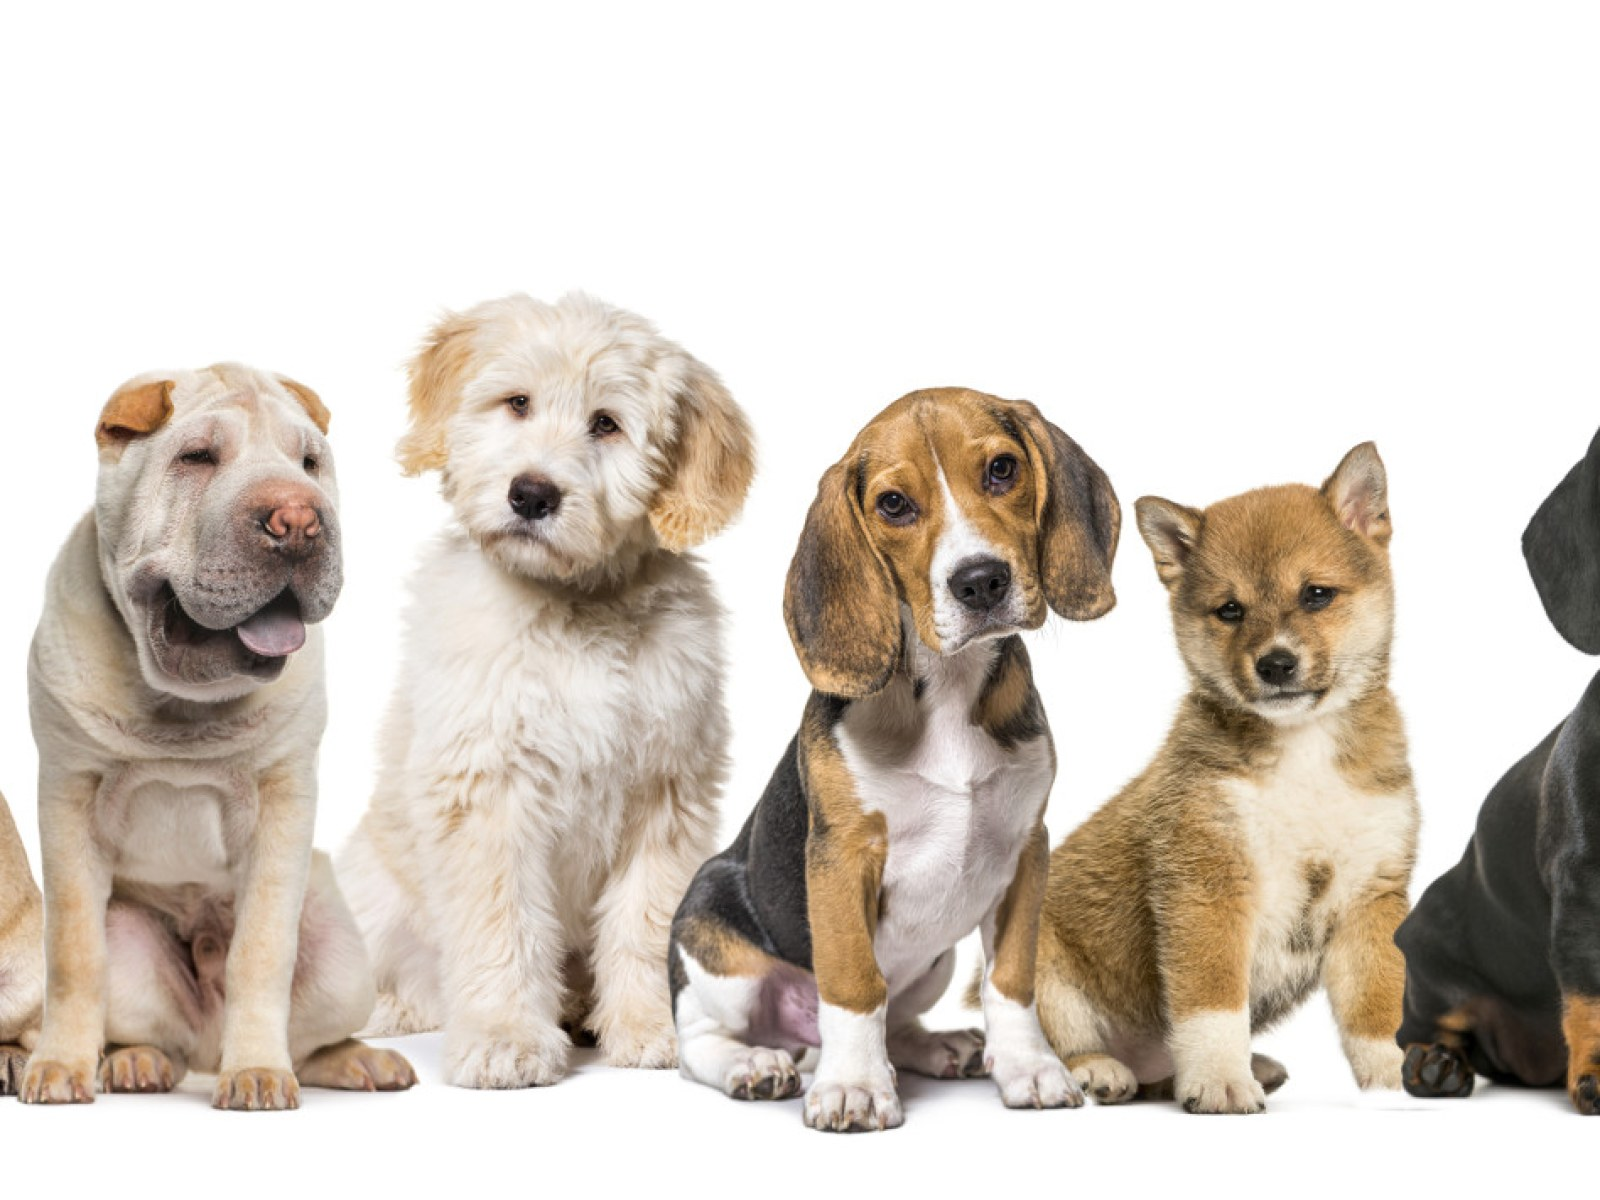

In [ ]:
import os
import base64

image = os.path.join(HOME_PATH, "images", "dogs.jpg")


def encode_image(filepath):
    with open(filepath, 'rb') as f:
        image_bytes = f.read()
    encoded = str(base64.b64encode(image_bytes), 'utf-8')
    return "data:image/jpg;base64,"+encoded


print(encode_image(image))

## Box Prompt

In [ ]:
%pip install jupyter_bbox_widget

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 367.8/367.8 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.0 MB/s eta 0:00:00


In [ ]:

from jupyter_bbox_widget import BBoxWidget


widget = BBoxWidget()
widget.image = encode_image(image)
widget

BBoxWidget(colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#b…

In [ ]:
import numpy as np

#results are saved in widget
box = widget.bboxes[0]
print(box)

box = np.array([
    box['x'],
    box['y'],
    box['x'] + box['width'],
    box['y'] + box['height']
])
print(box)

{'x': 393, 'y': 228, 'width': 359, 'height': 438, 'label': ''}
[393 228 752 666]


**NOTE:** `SamPredictor.predict` method takes `np.ndarray` `box` argument in `[x_min, y_min, x_max, y_max]` format.

In [ ]:
import cv2
import supervision as sv


img =  cv2.imread(image)
#cv2_imshow(img)

mask_predictor.set_image(img)
masks, scores, logits = mask_predictor.predict(
    box=box,
    multimask_output=True
)


In [ ]:
print(masks,'\n')
print(scores,'\n')
print(logits)

[[[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]] 

[0.97354275 0.98751974 0.9913461 ] 

[[[-19.245054 -20.279171 -20.23694  ... -18.697392 -21.14986  -19.204376]
  [-18.125147 -21.600054 -17.59355  ... -20.329824 -21.110287 -21.27351

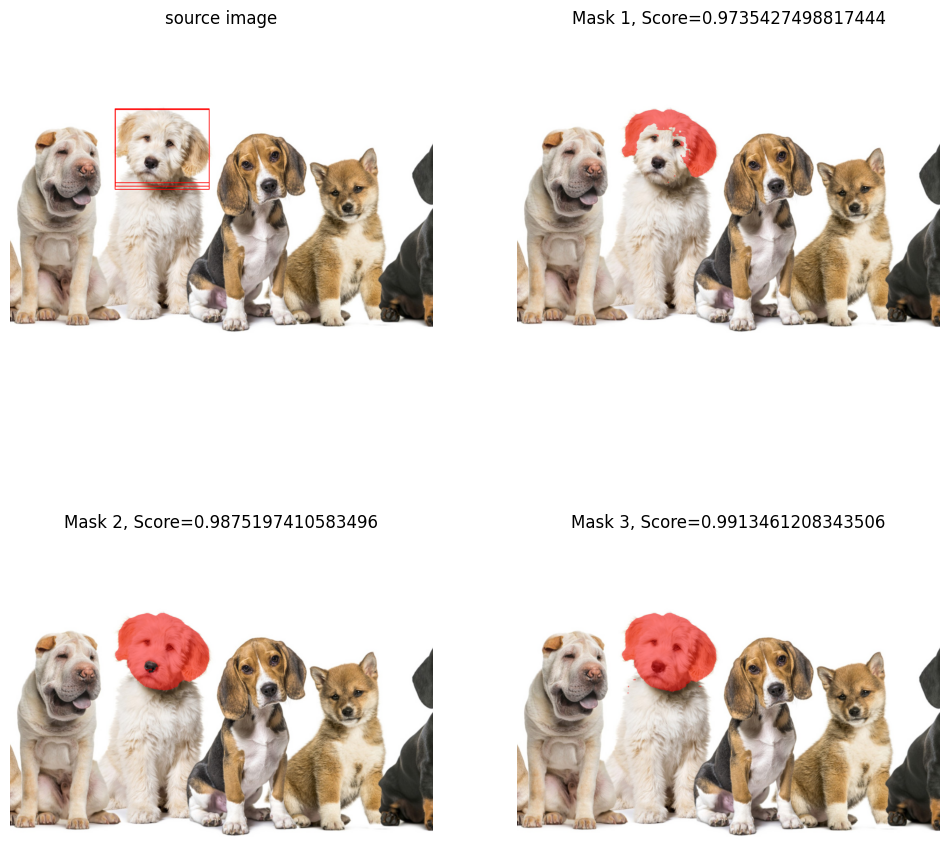

In [ ]:
box_annotator = sv.BoundingBoxAnnotator(color=sv.Color.RED,color_lookup=sv.ColorLookup.INDEX) #ColorLookup.INDEX is to handle detections missing class_id
mask_annotator = sv.MaskAnnotator(color=sv.Color.RED, color_lookup=sv.ColorLookup.INDEX)

detections = sv.Detections(
    xyxy=sv.mask_to_xyxy(masks=masks),
    mask=masks
)

#detections = detections[detections.area == np.max(detections.area)]

source_image = box_annotator.annotate(scene=img.copy(), detections=detections)
mask1 = mask_annotator.annotate(scene=img.copy(), detections=detections[0])
mask2 = mask_annotator.annotate(scene=img.copy(), detections=detections[1])
mask3 = mask_annotator.annotate(scene=img.copy(), detections=detections[2])

sv.plot_images_grid(
    images=[source_image, mask1, mask2, mask3],
    grid_size=(2, 2),
    titles=['source image',
            f'Mask 1, Score={scores[0]}',
            f'Mask 2, Score={scores[1]}',
            f'Mask 3, Score={scores[2]}'
            ]
)

## Point Prompt

In [ ]:
import cv2
import supervision as sv
from google.colab.patches import cv2_imshow


img =  cv2.imread(image)
#cv2_imshow(img)

mask_predictor.set_image(img)


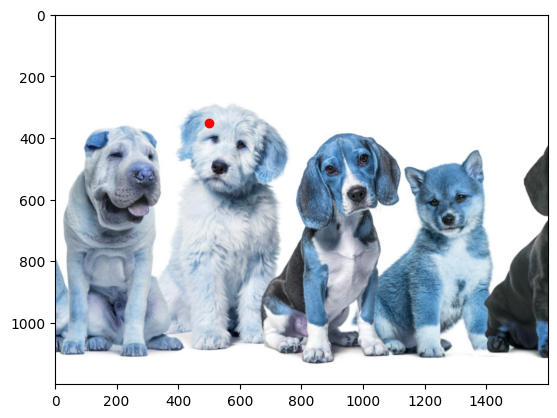

In [ ]:
import matplotlib.pyplot as plt

point = np.array([[500,350]])
masks, scores, logits = mask_predictor.predict(
    point_coords=point,
    point_labels=np.array([1]),
    multimask_output=True
)
plt.imshow(img)
plt.plot(point[0][0],point[0][1],'ro')
plt.axis('on')
plt.show()

Detections(xyxy=array([[ 397,  294,  753,  580],
       [ 337,  294,  751, 1086],
       [ 337,  293,  753, 1087]]), mask=array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, F

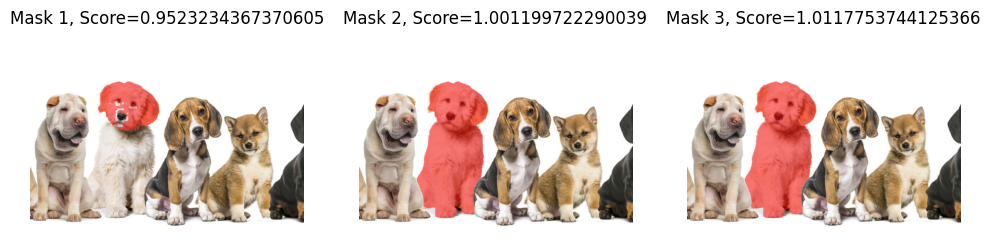

In [ ]:
dot_annotator = sv.DotAnnotator(color=sv.Color.RED, color_lookup=sv.ColorLookup.INDEX,radius=10)
mask_annotator = sv.MaskAnnotator(color=sv.Color.RED, color_lookup=sv.ColorLookup.INDEX)
detections = sv.Detections(
    xyxy=sv.mask_to_xyxy(masks=masks),
    mask=masks
)
mask1 = mask_annotator.annotate(scene=img.copy(), detections=detections[0])
mask2 = mask_annotator.annotate(scene=img.copy(), detections=detections[1])
mask3 = mask_annotator.annotate(scene=img.copy(), detections=detections[2])
print(detections)

sv.plot_images_grid(
    images=[mask1, mask2, mask3],
    grid_size=(1, 3),
    titles=[
            f'Mask 1, Score={scores[0]}',
            f'Mask 2, Score={scores[1]}',
            f'Mask 3, Score={scores[2]}'
            ]
)